<a href="https://colab.research.google.com/github/maheshyadav007/random_experiements/blob/main/2D_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import os

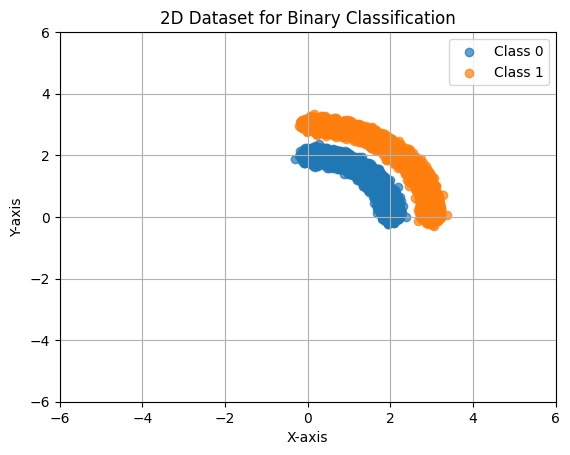

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of data points for each class
num_points = 10000

# Generate class 0 data points on a circle with radius 2
theta_0 = np.linspace(0, np.pi/2, num_points)
radius_0 = 2
class_0_x = radius_0 * np.cos(theta_0) + np.random.normal(0, 0.1, num_points)
class_0_y = radius_0 * np.sin(theta_0) + np.random.normal(0, 0.1, num_points)

# Generate class 1 data points on a circle with radius 4
theta_1 = np.linspace(0, np.pi/2, num_points)
radius_1 = 3
class_1_x = radius_1 * np.cos(theta_1) + np.random.normal(0, 0.1, num_points)
class_1_y = radius_1 * np.sin(theta_1) + np.random.normal(0, 0.1, num_points)

# Plot the generated data points
plt.scatter(class_0_x, class_0_y, label='Class 0', alpha=0.7)
plt.scatter(class_1_x, class_1_y, label='Class 1', alpha=0.7)

# Set plot details
plt.title('2D Dataset for Binary Classification')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.xlim(-radius_1*2, radius_1*2)
plt.ylim(-radius_1*2, radius_1*2)
plt.show()


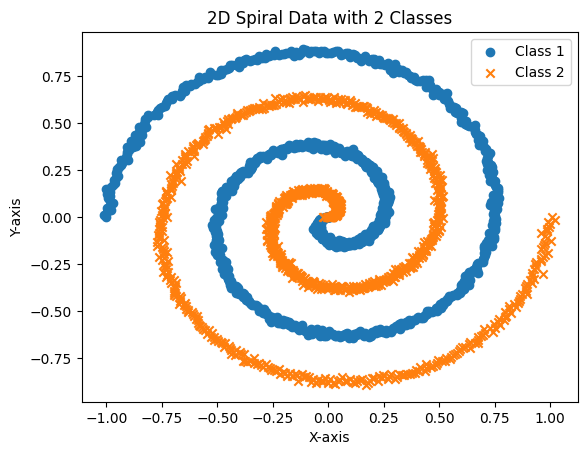

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral_data(num_points, noise=0.01):
    theta = np.linspace(0, 4 * np.pi, num_points)

    # Class 1 Spiral
    class1_radius = np.linspace(0, 1, num_points) + noise * np.random.randn(num_points)
    class1_x = class1_radius * np.cos(theta)
    class1_y = class1_radius * np.sin(theta)

    # Class 2 Spiral
    class2_radius = np.linspace(0, 1, num_points) + noise * np.random.randn(num_points)
    class2_x = class2_radius * np.cos(theta + np.pi)
    class2_y = class2_radius * np.sin(theta + np.pi)

    return class1_x, class1_y, class2_x, class2_y

# Number of points in each class
num_points = 1000

# Generate spiral data
class_0_x, class_0_y, class_1_x, class_1_y = generate_spiral_data(num_points)

# Plot the generated data
plt.scatter(class_1_x, class_1_y, label='Class 1', marker='o')
plt.scatter(class_0_x, class_0_y, label='Class 2', marker='x')
plt.title('2D Spiral Data with 2 Classes')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


Epoch [100/2000], Loss: 0.6559, Accuracy: 0.6070
Epoch [200/2000], Loss: 0.6162, Accuracy: 0.6295
Epoch [300/2000], Loss: 0.5389, Accuracy: 0.6815
Epoch [400/2000], Loss: 0.4387, Accuracy: 0.8025
Epoch [500/2000], Loss: 0.2996, Accuracy: 0.9495
Epoch [600/2000], Loss: 0.1882, Accuracy: 0.9950
Epoch [700/2000], Loss: 0.1126, Accuracy: 0.9945
Epoch [800/2000], Loss: 0.0662, Accuracy: 0.9945
Epoch [900/2000], Loss: 0.0452, Accuracy: 0.9960
Epoch [1000/2000], Loss: 0.0340, Accuracy: 0.9965
Epoch [1100/2000], Loss: 0.0273, Accuracy: 0.9960
Epoch [1200/2000], Loss: 0.0230, Accuracy: 0.9960
Epoch [1300/2000], Loss: 0.0201, Accuracy: 0.9960
Epoch [1400/2000], Loss: 0.0179, Accuracy: 0.9955
Epoch [1500/2000], Loss: 0.0163, Accuracy: 0.9955
Epoch [1600/2000], Loss: 0.0152, Accuracy: 0.9955
Epoch [1700/2000], Loss: 0.0144, Accuracy: 0.9955
Epoch [1800/2000], Loss: 0.0137, Accuracy: 0.9955
Epoch [1900/2000], Loss: 0.0131, Accuracy: 0.9955
Epoch [2000/2000], Loss: 0.0127, Accuracy: 0.9960
Final Acc

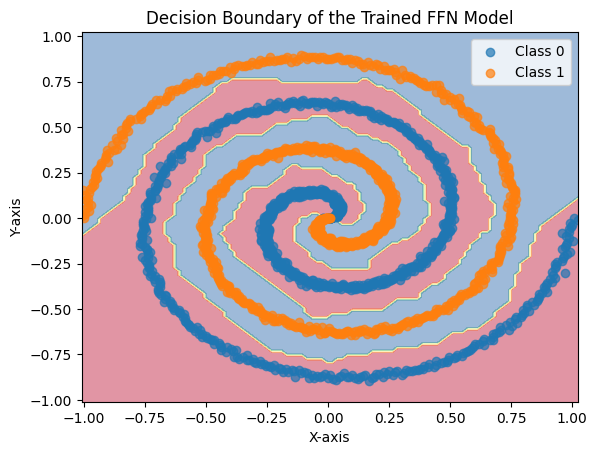

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert the generated data to PyTorch tensors
inputs = torch.cat([torch.Tensor(class_0_x).view(-1, 1), torch.Tensor(class_0_y).view(-1, 1)], dim=1)
labels_0 = torch.zeros(num_points, dtype=torch.long)

inputs_1 = torch.cat([torch.Tensor(class_1_x).view(-1, 1), torch.Tensor(class_1_y).view(-1, 1)], dim=1)
labels_1 = torch.ones(num_points, dtype=torch.long)

inputs = torch.cat([inputs, inputs_1], dim=0)
labels = torch.cat([labels_0, labels_1], dim=0)

# Shuffle the data
indices = torch.randperm(len(inputs))
inputs = inputs[indices]
labels = labels[indices]

# Define the FFN model
class FFNModel(nn.Module):
    def __init__(self):
        super(FFNModel, self).__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(8, 8)
        self.fc4 = nn.Linear(8, 8)
        self.fc5 = nn.Linear(32, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        # x = torch.relu(self.fc3(x))
        # x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        return x

# Instantiate the model, loss function, and optimizer
model = FFNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
output_vectors_list = []
# Training loop
num_epochs = 2000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(inputs)
    output_vectors_list.append(outputs.detach().numpy())
    # Compute the loss
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == labels).float().mean().item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

# Calculate final accuracy on the entire dataset
with torch.no_grad():
    final_outputs = model(inputs)
    _, final_predicted = torch.max(final_outputs, 1)
    final_accuracy = (final_predicted == labels).float().mean().item()

print(f'Final Accuracy on the Entire Dataset: {final_accuracy:.4f}')




# Plot the decision boundary
x_min, x_max = torch.min(inputs), torch.max(inputs)
y_min, y_max =torch.min(inputs), torch.max(inputs)
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_tensor = torch.cat([torch.Tensor(xx.ravel()).view(-1, 1), torch.Tensor(yy.ravel()).view(-1, 1)], dim=1)
pred_labels = model(grid_tensor).argmax(dim=1).numpy().reshape(xx.shape)

plt.contourf(xx, yy, pred_labels, cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(class_0_x, class_0_y, label='Class 0', alpha=0.7)
plt.scatter(class_1_x, class_1_y, label='Class 1', alpha=0.7)
plt.title('Decision Boundary of the Trained FFN Model')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


In [ ]:
# Convert the list of output vectors to a numpy array
output_vectors_array = np.array(output_vectors_list)
# Create a directory to store frames
os.makedirs('output_frames', exist_ok=True)

# Visualize the output vectors and save frames
for epoch in range(0, num_epochs, 10):  # Visualize every 10 epochs
    plt.scatter(output_vectors_array[epoch, :, 0], output_vectors_array[epoch, :, 1], c=labels, cmap=plt.cm.Spectral, alpha=0.7)
    plt.title(f'Epoch {epoch+1}')
    plt.xlabel('Output Dimension 1')
    plt.ylabel('Output Dimension 2')
    plt.savefig(f'output_frames/frame_{epoch}.png')
    plt.close()
# plot_decision_boundary_with_inputs(model, inputs, labels, 0, 5, 0, 5)

# Create a GIF from the saved frames
fig, ax = plt.subplots()
frames = []

for epoch in range(0, num_epochs, 10):  # Visualize every 10 epochs
    img = plt.imread(f'output_frames/frame_{epoch}.png')
    frames.append([ax.imshow(img)])

ani = animation.ArtistAnimation(fig, frames, interval=100, blit=True)
# plt.colorbar(scatter, ax=ax)
plt.title('Visualization of Output Vectors Over Epochs')
plt.xlabel('Output Dimension 1')
plt.ylabel('Output Dimension 2')

# Save the animation as a GIF
ani.save('output_vectors_animation.gif', writer='imagemagick', fps=10)

# Display the final GIF
plt.show()